### purpose

find subpopIDs for populations in northwest corner, range center, and southeast corner (n=9 subpops for each block)

this notebook sets up code in MVP_summary_functions to get these pops

In [1]:
from pythonimports import *

import MVP_03_validate_gradient_forests as mvp03
import MVP_06_validate_RONA as mvp06
import MVP_summary_functions as mvp

import seaborn as sns

mvp.latest_commit()
session_info.show()

#########################################################
Today:	March 10, 2023 - 09:18:45
python version: 3.8.5

Current commit of pythonimports:
commit 8d4f83fd91caa2e58acbafcadfde07d19ae79379  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Mar 3 00:48:36 2023 -0500

Current commit of MVP_offsets:
commit 1c3f8de7953b9293f0af488334bb071b3cd79ec7  
Merge: 2eb6947 1d9a0fc  
Author: Brandon Lind <lind.brandon.m@gmail.com>
#########################################################



In [2]:
subset, locations, envdata = mvp06.get_pop_data(mvp.slimdir, '1231094')  # arbitrary seed for population info

locations


Reading in info for subsampled individuals ...


,lon,lat
subpopID,,
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
...,...,...
96,6.0,10.0
97,7.0,10.0
98,8.0,10.0


In [3]:
# fill out landscape with popIDs
df = mvp03.blank_dataframe()

for pop, (lon, lat) in locations.iterrows():
    df.loc[lat, lon] = pop
    
df

,1,2,3,4,5,6,7,8,9,10
10,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
9,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0
8,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0
7,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0
6,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
5,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0
4,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0
3,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
2,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0


In [4]:
# gather subpopIDs for each block, plot for sanity check
block_pops = defaultdict(list)
block_df = mvp03.blank_dataframe()
for block in range(3):
    if block == 0:
        b = df.loc[df.index > 7 , df.columns < 4]
        block_id = 'northwest'
        
    elif block == 1:
        b = df.loc[df.index.isin([4, 5, 6]), df.columns.isin([4, 5, 6])]
        block_id = 'rangecenter'
    
    elif block == 2:
        b = df.loc[df.index < 4, df.columns > 7]
        block_id = 'southeast'
    
    block_pops[block_id] = flatten(b.values)
    
    block_df.loc[b.index, b.columns] = block_id
    
block_df

,1,2,3,4,5,6,7,8,9,10
10,northwest,northwest,northwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,northwest,northwest,northwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,northwest,northwest,northwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,rangecenter,rangecenter,rangecenter,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,rangecenter,rangecenter,rangecenter,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,rangecenter,rangecenter,rangecenter,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,southeast,southeast,southeast
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,southeast,southeast,southeast
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,southeast,southeast,southeast


In [5]:
for block_id, subpops in block_pops.items():
    print(f'\n{block_id}')
    x = subset[subset.subpopID.isin(subpops)].groupby('subpopID')[['sal_opt', 'temp_opt']].apply(np.mean)
    display(x)


northwest


,sal_opt,temp_opt
subpopID,,
71,-1.000000,0.555556
72,-0.777778,0.555556
73,-0.555556,0.555556
81,-1.000000,0.777778
82,-0.777778,0.777778
83,-0.555556,0.777778
91,-1.000000,1.000000
92,-0.777778,1.000000
93,-0.555556,1.000000



rangecenter


,sal_opt,temp_opt
subpopID,,
34,-0.333333,-0.333333
35,-0.111111,-0.333333
36,0.111111,-0.333333
44,-0.333333,-0.111111
45,-0.111111,-0.111111
46,0.111111,-0.111111
54,-0.333333,0.111111
55,-0.111111,0.111111
56,0.111111,0.111111



southeast


,sal_opt,temp_opt
subpopID,,
8,0.555556,-1.000000
9,0.777778,-1.000000
10,1.000000,-1.000000
18,0.555556,-0.777778
19,0.777778,-0.777778
20,1.000000,-0.777778
28,0.555556,-0.555556
29,0.777778,-0.555556
30,1.000000,-0.555556


In [6]:
block_pops

defaultdict(list,
            {'northwest': [91.0,
              92.0,
              93.0,
              81.0,
              82.0,
              83.0,
              71.0,
              72.0,
              73.0],
             'rangecenter': [54.0,
              55.0,
              56.0,
              44.0,
              45.0,
              46.0,
              34.0,
              35.0,
              36.0],
             'southeast': [28.0,
              29.0,
              30.0,
              18.0,
              19.0,
              20.0,
              8.0,
              9.0,
              10.0]})

In [7]:
# how it will appear in MVP_summary_functions
block_pops = {
    'northwest': [91, 92, 93, 81, 82, 83, 71, 72, 73],
    'rangecenter': [54, 55, 56, 44, 45, 46, 34, 35, 36],
    'southeast': [28, 29, 30, 18, 19, 20, 8, 9, 10]
}

### visualize environments

<AxesSubplot:>

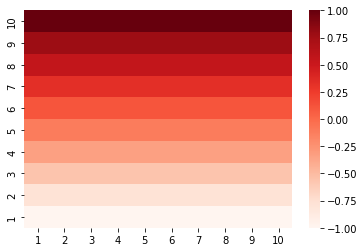

In [9]:
df = mvp03.blank_dataframe()

for pop, (lon, lat) in locations.iterrows():
    df.loc[lat, lon] = envdata.loc[pop, 'temp_opt']
    
    
sns.heatmap(df, cmap='Reds')    

<AxesSubplot:>

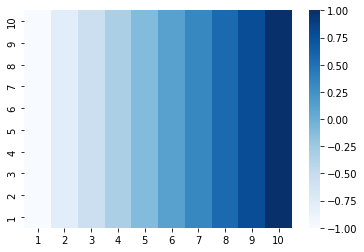

In [10]:
df = mvp03.blank_dataframe()

for pop, (lon, lat) in locations.iterrows():
    df.loc[lat, lon] = envdata.loc[pop, 'sal_opt']
    
    
sns.heatmap(df, cmap='Blues')    